In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Datasets/class_exercise/snsdata1.csv")
df.head()

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
df.shape

(4566, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   grad year     4566 non-null   int64  
 1   gender        4131 non-null   object 
 2   age           3840 non-null   float64
 3   friends       4566 non-null   int64  
 4   basketball    4566 non-null   int64  
 5   football      4566 non-null   int64  
 6   soccer        4566 non-null   int64  
 7   softball      4566 non-null   int64  
 8   volleyball    4566 non-null   int64  
 9   swimming      4566 non-null   int64  
 10  cheerleading  4566 non-null   int64  
 11  baseball      4566 non-null   int64  
 12  tennis        4566 non-null   int64  
 13  sports        4566 non-null   int64  
 14  cute          4566 non-null   int64  
 15  sex           4566 non-null   int64  
 16  sexy          4566 non-null   int64  
 17  hot           4566 non-null   int64  
 18  kissed        4566 non-null 

In [5]:
df.isna().sum()

grad year         0
gender          435
age             726
friends           0
basketball        0
football          0
soccer            0
softball          0
volleyball        0
swimming          0
cheerleading      0
baseball          0
tennis            0
sports            0
cute              0
sex               0
sexy              0
hot               0
kissed            0
dance             0
band              0
marching          0
music             0
rock              0
god               0
church            0
jesus             0
bible             0
hair              0
dress             0
blonde            0
mall              0
shopping          0
clothes           0
hollister         0
abercrombie       0
die               0
death             0
drunk             0
drugs             0
dtype: int64

age, gender has missing values

In [6]:
mode_gender = df['gender'].mode()[0]  # Get the mode
df['gender'].fillna(mode_gender, inplace=True)

In [7]:
df['gender'].value_counts()

gender
F    3606
M     960
Name: count, dtype: int64

1. Most of the them are females

<Axes: >

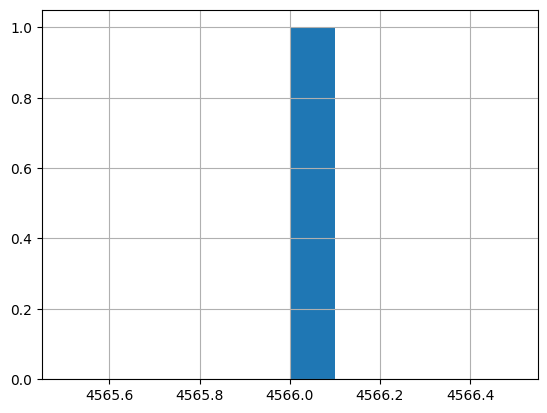

In [8]:
df['grad year'].value_counts().hist()

All entries are 2022. So drop the column

In [9]:
df.drop(columns=['grad year'], inplace=True)

In [10]:
# Age column is float type
# df_num['age'] = np.floor(df_num['age']).astype(pd.Int64Dtype())
# df_num.head()

In [11]:
df['age'].describe()

count    3840.000000
mean       19.149429
std         6.388005
min         5.194000
25%        18.379000
50%        18.678000
75%        18.987750
max       106.927000
Name: age, dtype: float64

In [12]:
df['age'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

0.10    18.198
0.20    18.327
0.30    18.431
0.40    18.552
0.50    18.678
0.60    18.801
0.70    18.924
0.80    19.058
0.90    19.231
0.95    19.433
Name: age, dtype: float64

2. Most ages are clustered closely around 18–19 years.

In [13]:
age_mean = df['age'].mean()
df['age'].fillna(age_mean, inplace=True)

In [14]:
df.isna().sum()

gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

All missing values are treated.

In [15]:
df['friends'].describe()

count    4566.000000
mean       26.120456
std        32.065369
min         0.000000
25%         2.000000
50%        16.000000
75%        38.000000
max       373.000000
Name: friends, dtype: float64

Text(0, 0.5, 'Frequency')

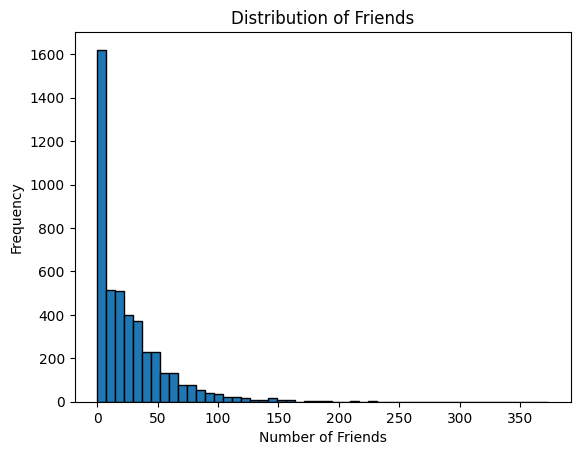

In [16]:
df['friends'].hist(bins=50, edgecolor='black', grid=False)
plt.title('Distribution of Friends')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')

<Axes: >

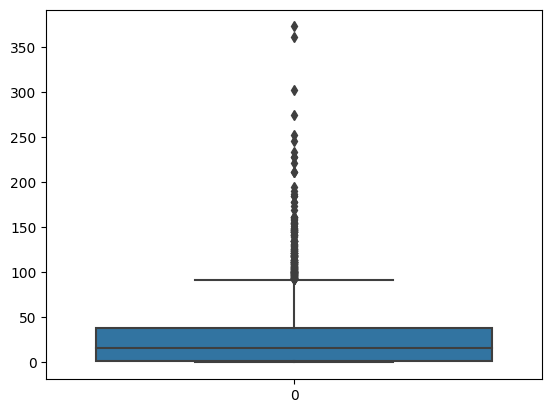

In [17]:
sns.boxplot(df['friends'])

3. There are outliers in the friends.

In [18]:
# def outlierTreat(df):
#     upper_bound = df.quantile(.9)
#     lower_bound = df.quantile(.1)
#     return df.clip(lower=lower_bound, upper=upper_bound)

In [19]:
# df['friends'] = outlierTreat(df['friends'])
# sns.boxplot(outlierTreat(df['friends']))

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4566.0,19.149429,5.858061,5.194,18.431,18.795,19.149429,106.927
friends,4566.0,26.120456,32.065369,0.000,2.000,16.000,38.000000,373.000
basketball,4566.0,0.211345,0.759756,0.000,0.000,0.000,0.000000,22.000
football,4566.0,0.228866,0.686250,0.000,0.000,0.000,0.000000,10.000
soccer,4566.0,0.150898,0.699715,0.000,0.000,0.000,0.000000,14.000
softball,4566.0,0.105125,0.596364,0.000,0.000,0.000,0.000000,12.000
volleyball,4566.0,0.091108,0.493573,0.000,0.000,0.000,0.000000,11.000
swimming,4566.0,0.101183,0.399686,0.000,0.000,0.000,0.000000,7.000
cheerleading,4566.0,0.073587,0.440371,0.000,0.000,0.000,0.000000,9.000
baseball,4566.0,0.098774,0.583162,0.000,0.000,0.000,0.000000,16.000


EDA for sports wear

In [21]:
# columns of interest
sports_cols = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports']
# remaining columns
physical_appearance_cols = ['cute', 'sexy', 'hot', 'blonde', 'hair', 'dress']
shopping_and_brands_cols = ['mall', 'shopping', 'clothes', 'hollister', 'abercrombie']
music_and_band_cols = ['music', 'band', 'marching', 'rock']
religion_cols = ['god', 'church', 'jesus', 'bible']
social_behaviors_cols = ['kissed', 'sex', 'dance', 'drunk', 'drugs']
mortality_cols = ['die', 'death']

In [22]:
# Create a new DataFrame for the categorized columns
new_df = pd.DataFrame()

# Retain some key information in the new DataFrame
new_df['age'] = df['age']
new_df['gender'] = df['gender']
new_df['friends'] = df['friends']

# Add individual sports columns
for sport in sports_cols:
    new_df[sport] = df[sport]

# Sum the interests
new_df['sports_interest'] = df[sports_cols].sum(axis=1)
new_df['physical_appearance_interest'] = df[physical_appearance_cols].sum(axis=1)
new_df['shopping_interest'] = df[shopping_and_brands_cols].sum(axis=1)
new_df['music_interest'] = df[music_and_band_cols].sum(axis=1)
new_df['religion_interest'] = df[religion_cols].sum(axis=1)
new_df['social_behaviors_interest'] = df[social_behaviors_cols].sum(axis=1)
new_df['mortality_interest'] = df[mortality_cols].sum(axis=1)

In [23]:
# droping the sports column as sports_interest col is added
new_df.drop(columns=['sports'], inplace=True)

In [24]:
new_df.to_csv("sns_modified.csv") # save the result

In [25]:
new_df.head()

,age,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports_interest,physical_appearance_interest,shopping_interest,music_interest,religion_interest,social_behaviors_interest,mortality_interest
0,18.982,M,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,18.801,F,0,0,1,0,0,0,0,0,0,0,1,11,1,4,1,0,0
2,18.335,M,69,0,1,0,0,0,0,0,0,0,1,0,0,3,0,0,1
3,18.875,F,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,18.995,F,10,0,0,0,0,0,0,0,0,0,0,1,2,4,1,9,0


In [26]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4566.0,19.149429,5.858061,5.194,18.431,18.795,19.149429,106.927
friends,4566.0,26.120456,32.065369,0.000,2.000,16.000,38.000000,373.000
basketball,4566.0,0.211345,0.759756,0.000,0.000,0.000,0.000000,22.000
football,4566.0,0.228866,0.686250,0.000,0.000,0.000,0.000000,10.000
soccer,4566.0,0.150898,0.699715,0.000,0.000,0.000,0.000000,14.000
softball,4566.0,0.105125,0.596364,0.000,0.000,0.000,0.000000,12.000
volleyball,4566.0,0.091108,0.493573,0.000,0.000,0.000,0.000000,11.000
swimming,4566.0,0.101183,0.399686,0.000,0.000,0.000,0.000000,7.000
cheerleading,4566.0,0.073587,0.440371,0.000,0.000,0.000,0.000000,9.000
baseball,4566.0,0.098774,0.583162,0.000,0.000,0.000,0.000000,16.000


In [27]:
sports_cols = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis']

In [28]:
sport_interest_sum = new_df[sports_cols].sum()
sport_interest_sum

basketball       965
football        1045
soccer           689
softball         480
volleyball       416
swimming         462
cheerleading     336
baseball         451
tennis           336
dtype: int64

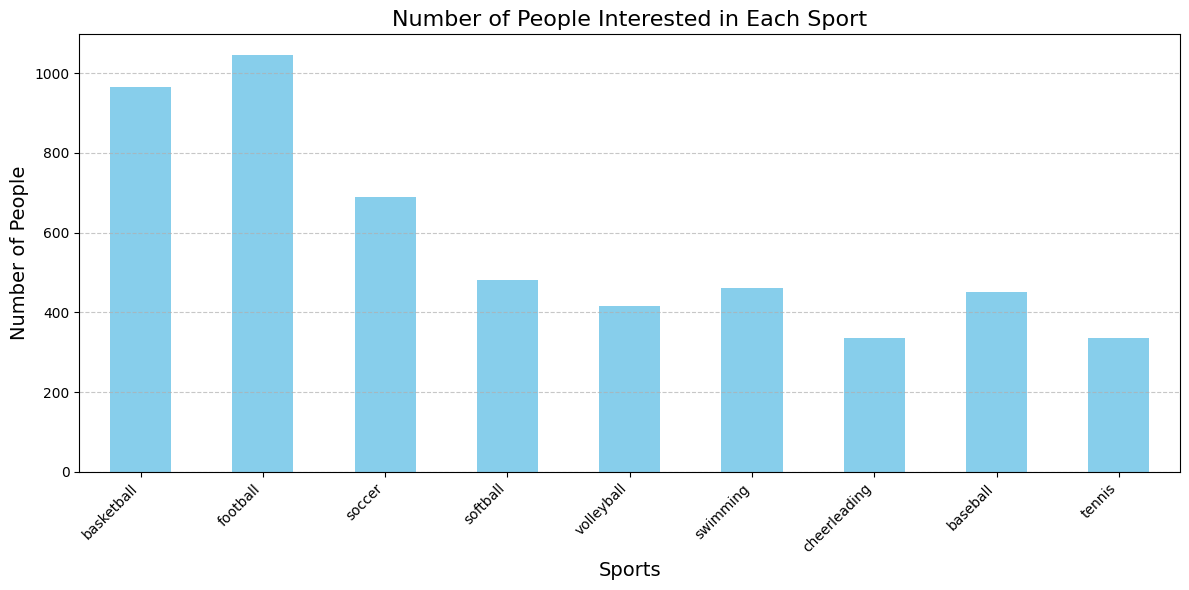

In [29]:
# Create a bar plot for sports interests
plt.figure(figsize=(12, 6))
sport_interest_sum.plot(kind='bar', color='skyblue')
plt.title('Number of People Interested in Each Sport', fontsize=16)
plt.xlabel('Sports', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. more number of people are intersted in basketball, football, soccer

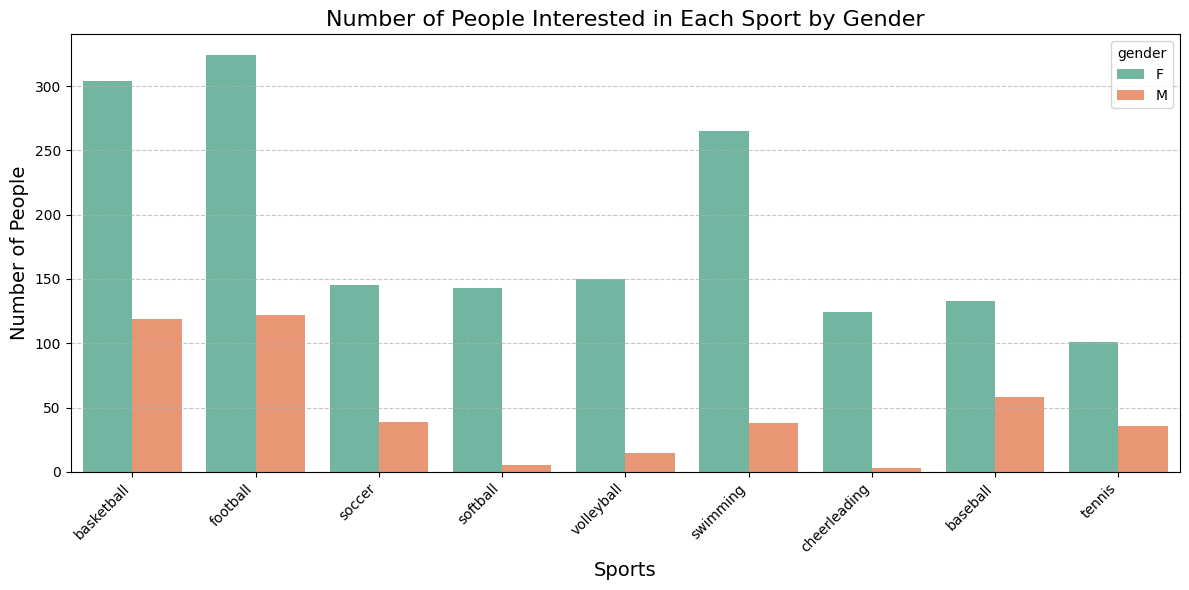

In [31]:
import seaborn as sns

# Melt the DataFrame to long-form format suitable for seaborn
df_melted = df.melt(id_vars=['gender'], value_vars=sports_cols, var_name='Sport', value_name='Interest')

# Plot the barplot using seaborn with hue='gender'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted[df_melted['Interest'] == 1], x='Sport', hue='gender', palette='Set2')
plt.title('Number of People Interested in Each Sport by Gender', fontsize=16)
plt.xlabel('Sports', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


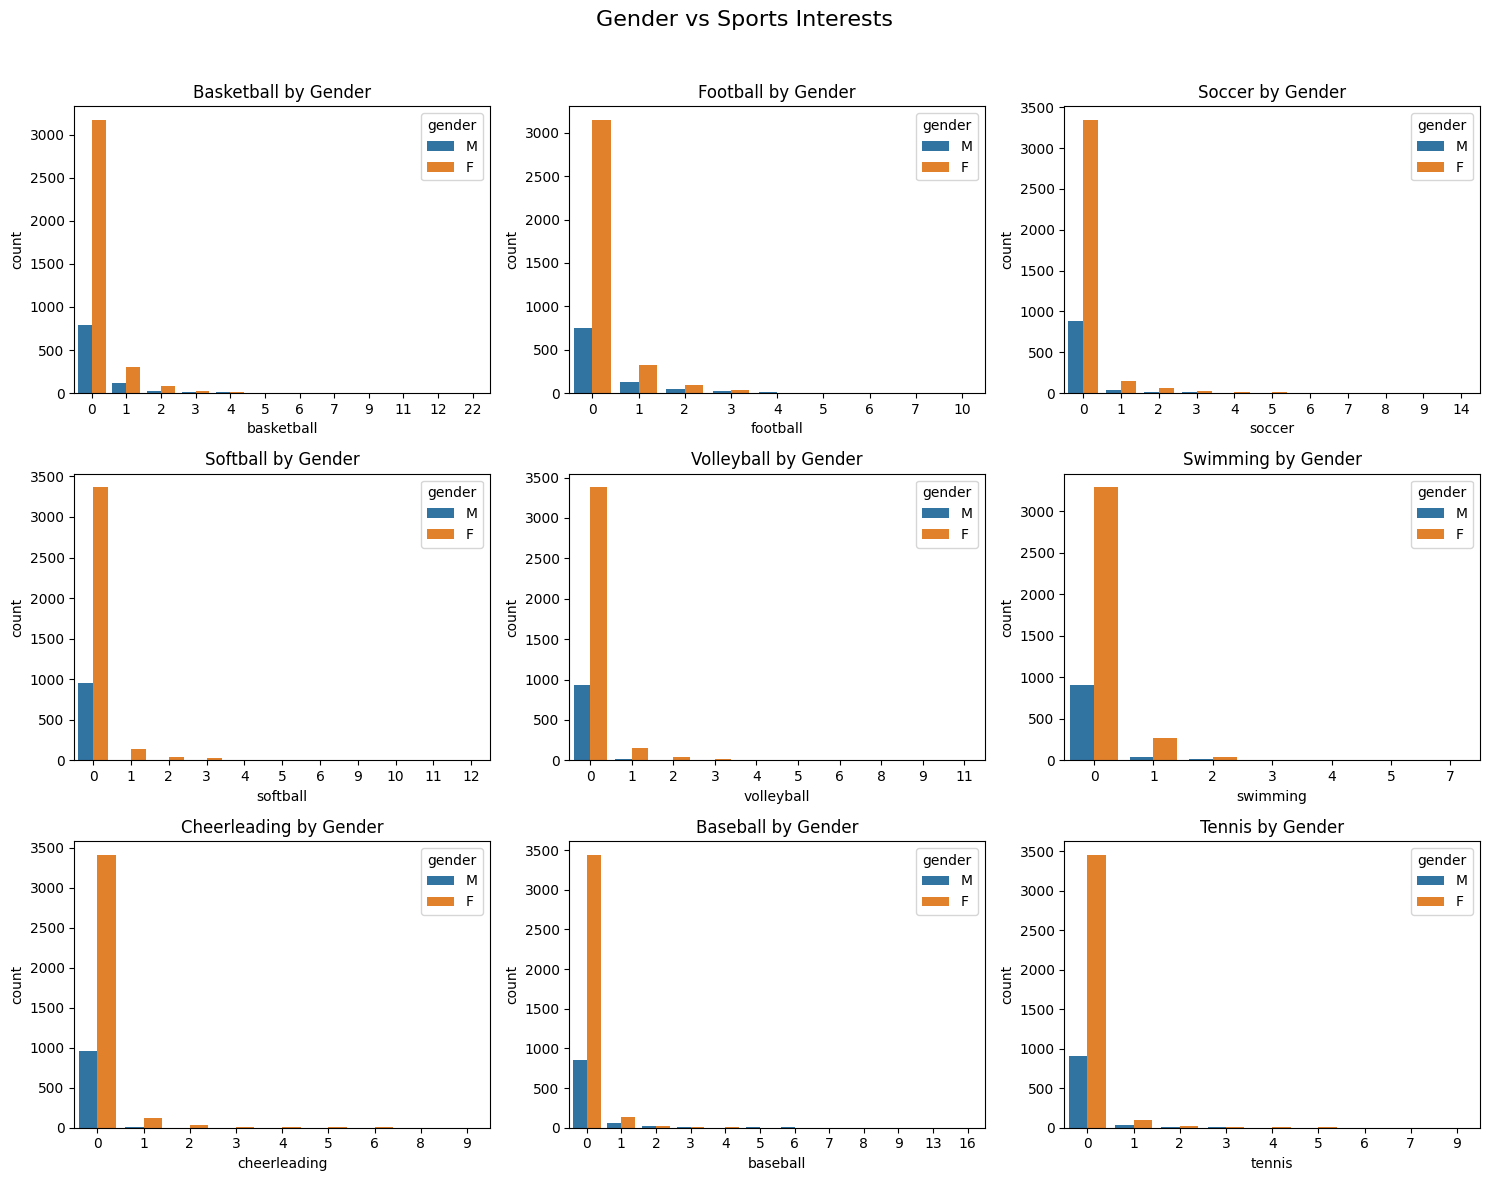

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of sports
sports = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis']

# Set up the subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns of subplots
fig.suptitle('Gender vs Sports Interests', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through sports and create a countplot for each on a separate subplot
for i, sport in enumerate(sports):
    sns.countplot(ax=axes[i], data=new_df, x=sport, hue='gender')
    axes[i].set_title(f'{sport.capitalize()} by Gender')

# Remove any unused subplots (if needed)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()


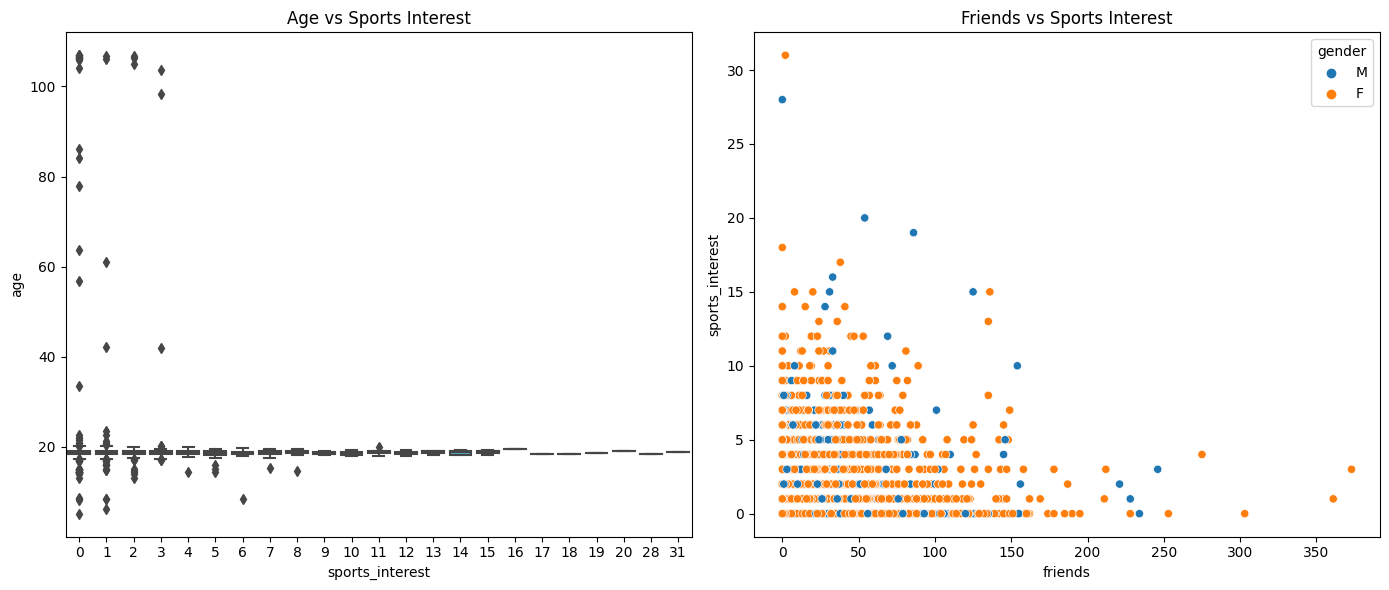

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns for side-by-side plots

# Age vs Sports Interest
sns.boxplot(ax=axes[0], data=new_df, x='sports_interest', y='age')
axes[0].set_title('Age vs Sports Interest')

# Friends vs Sports Interest
sns.scatterplot(ax=axes[1], data=new_df, x='friends', y='sports_interest', hue='gender')
axes[1].set_title('Friends vs Sports Interest')

plt.tight_layout()
plt.show()


In [44]:
# 1. Analyze Age and Friends by Sports Interest
age_friends_summary = {}

for sport in sports_cols:
    interested = new_df[new_df[sport] > 0]
    age_friends_summary[sport] = {
        'Mean_Age': interested['age'].mean(),
        'Mean_Friends': interested['friends'].mean(),
        'Count': interested.shape[0]
    }

# Convert summary to DataFrame for better visualization
summary_df = pd.DataFrame(age_friends_summary).T

# Display the summary DataFrame
print(summary_df)

               Mean_Age  Mean_Friends  Count
basketball    18.674136     30.438017  605.0
football      19.062295     30.326347  668.0
soccer        19.436862     28.885294  340.0
softball      18.640689     28.238866  247.0
volleyball    18.980436     32.258065  248.0
swimming      18.954444     30.139344  366.0
cheerleading  19.529249     33.397959  196.0
baseball      18.769677     27.431818  264.0
tennis        18.754930     26.643216  199.0


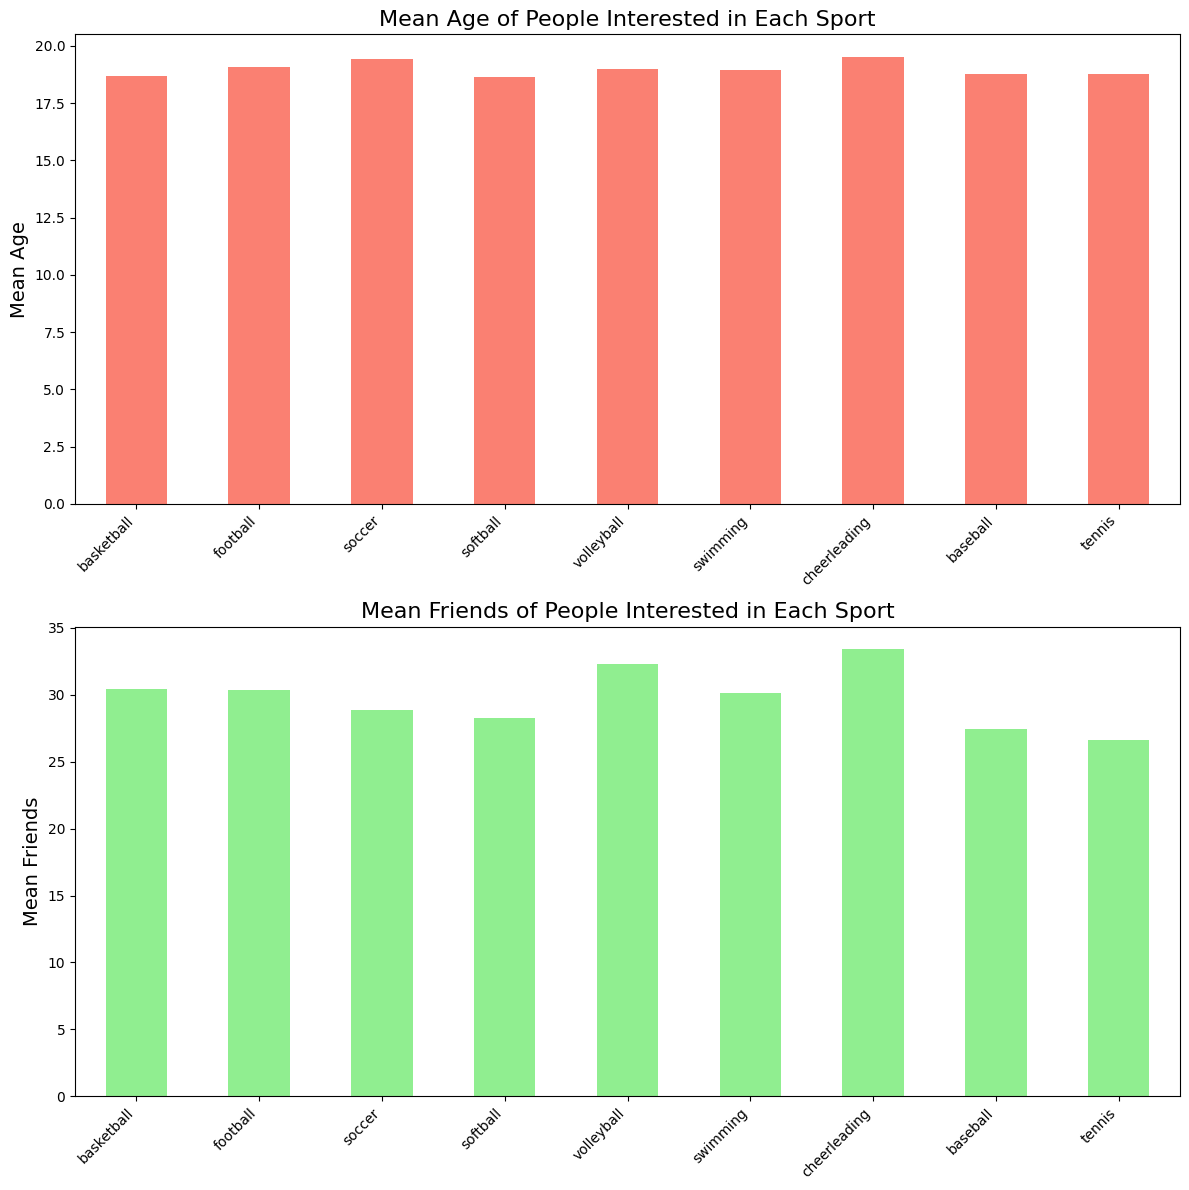

In [45]:
# Visualize the Effects of Age and Friends by Sports Interest
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Mean Age
summary_df['Mean_Age'].plot(kind='bar', ax=axes[0], color='salmon')
axes[0].set_title('Mean Age of People Interested in Each Sport', fontsize=16)
axes[0].set_ylabel('Mean Age', fontsize=14)
axes[0].set_xticklabels(summary_df.index, rotation=45, ha='right')

# Plot for Mean Friends
summary_df['Mean_Friends'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Mean Friends of People Interested in Each Sport', fontsize=16)
axes[1].set_ylabel('Mean Friends', fontsize=14)
axes[1].set_xticklabels(summary_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Categorical

In [49]:
from scipy.stats import chi2_contingency

# Perform chi-squared test for each sport
for sport in sports_cols:
    crosstab = pd.crosstab(df['gender'], new_df[sport])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-squared test for {sport} and Gender: p-value = {p:.3f}")


Chi-squared test for basketball and Gender: p-value = 0.000
Chi-squared test for football and Gender: p-value = 0.000
Chi-squared test for soccer and Gender: p-value = 0.044
Chi-squared test for softball and Gender: p-value = 0.000
Chi-squared test for volleyball and Gender: p-value = 0.000
Chi-squared test for swimming and Gender: p-value = 0.006
Chi-squared test for cheerleading and Gender: p-value = 0.000
Chi-squared test for baseball and Gender: p-value = 0.000
Chi-squared test for tennis and Gender: p-value = 0.372


Numerical

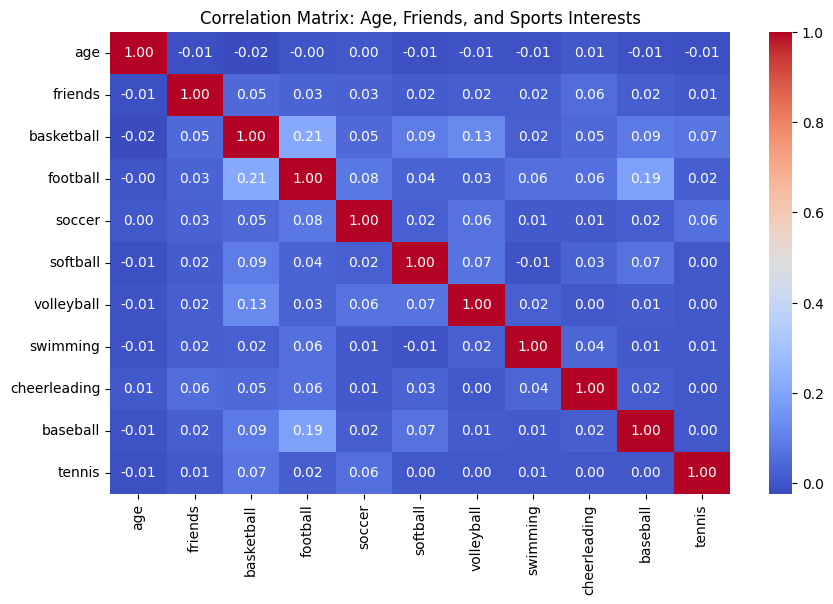

In [48]:
# Select numerical columns (age, friends, and sports columns)
numerical_columns = ['age', 'friends'] + sports_cols

# Compute the correlation matrix
correlation_matrix = new_df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Age, Friends, and Sports Interests')
plt.show()


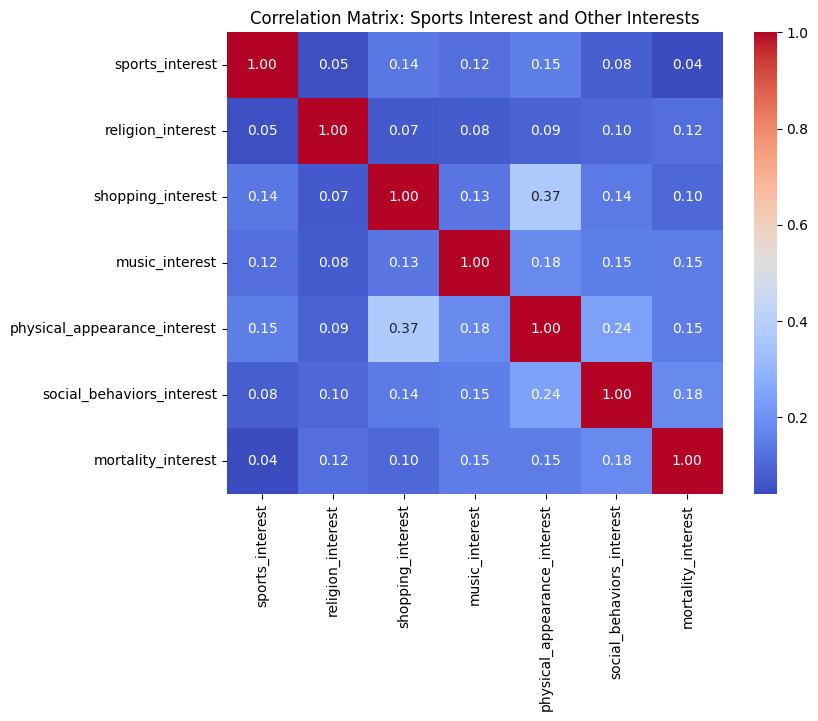

In [56]:
# List of interest columns (other than sports)
interest_columns = ['sports_interest', 'religion_interest', 'shopping_interest', 
                    'music_interest', 'physical_appearance_interest', 
                    'social_behaviors_interest', 'mortality_interest']

# Compute the correlation matrix for interest columns
correlation_matrix = new_df[interest_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Sports Interest and Other Interests')
plt.show()
